In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('dulieuxettuyendaihoc.csv')

In [4]:
df.head(10)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,M,NaN,1,1.50,4.00,6.00,D1,12/7/2018,No
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,F,NaN,2,3.75,4.50,4.25,D1,12/7/2018,Yes
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,F,NaN,1,3.50,3.50,6.75,D1,12/7/2018,Yes
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,F,NaN,1,4.00,4.75,5.50,D1,12/7/2018,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   T1                   100 non-null    float64
 2   T2                   100 non-null    float64
 3   T3                   100 non-null    float64
 4   T4                   100 non-null    float64
 5   T5                   100 non-null    float64
 6   T6                   100 non-null    float64
 7   GT                   100 non-null    object 
 8   DT                   3 non-null      float64
 9   KV                   100 non-null    object 
 10  NGONNGU              100 non-null    float64
 11  TOANLOGICPHANTICH    100 non-null    float64
 12  GIAIQUYETVANDE       100 non-null    float64
 13  KT                   100 non-null    object 
 14  NGAYTHI              100 non-null    object 
 15  DINHHUONGNGHENGHIEP  100 non-null    obje

In [6]:
df=df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH', 'GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]

In [7]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)

In [18]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [8]:
#Xóa dòng dl rỗng
df.dropna(how='all',inplace=True)

In [9]:
#Xóa dl trùng
df.drop_duplicates(inplace=True)

In [10]:
import matplotlib.pyplot as plt

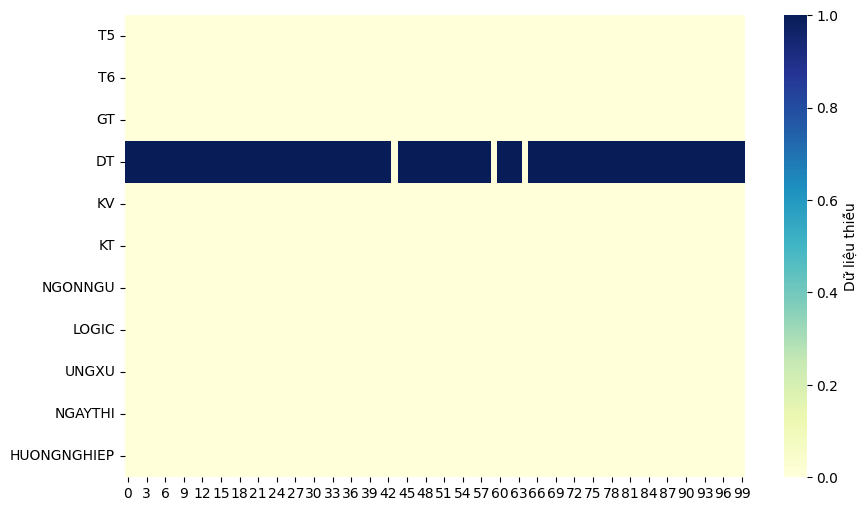

In [11]:
# dùng heatmap để trực quan dữ liệu thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png',dpi=100)
#note: với dl thiếu
# 1.cần xác định biến số nào bị thiếu
# 2.mức độ thiếu của dữ liệu
# 3.có cần phải xử lí không

In [12]:
# điền giá trị thiếu
df['DT'].fillna('KINH',inplace=True)
# lưu ý: với biến định tính ta có thể thay
# bằng giá trị yếu vị(mode) cái xuất hiện nhiều nhất
#Note điền thiếu: định tính : điền giá trị nhiều nhất, định lượng : điền trung vị


In [13]:
# điền thiếu giá trị phần NGONNGU bằng 0(nếu có)
df['NGONNGU'].fillna(0,inplace=True)
#điền thiếu giá trị phần LOGIC bằng trung bình(nếu có)
df['LOGIC'].fillna(df['LOGIC'].mean(),inplace=True)
#điền thiếu giá trị phần UNGXU bằng trung bình(nếu có)
df['UNGXU'].fillna(df['UNGXU'].mean(),inplace=True)
#lưu ý: với biến định lượng thì ta nên thay bằng trung vị


In [14]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No


In [15]:
#phần 2:
#kỹ thuật Feature Engineering(hưởng dùng cho Machine Learning)
#Nếu chỉ là xử lí nhân phân tích dữ liệu thì ta gọi là New...

#đây là kỹ thuật tạo thêm hoặc biến đổi số liệu sẵn có 
#các biến số mới phù hợp nghiệp vụ để phân tích
#tạo biến tbtoan lớp 12
df['TBTOAN']=(df['T5']+df['T6'])/2

In [16]:
# tại biến xếp loại: đánh giá môn toán dựa trên df['TBTOAN]
df.loc[df['TBTOAN']<5.0,'XEPLOAI']='FAIL'
df.loc[(df['TBTOAN']>=5.0)&
       (df['TBTOAN']<7.0),'XEPLOAI']='FAIR'
df.loc[(df['TBTOAN']>=7.0)&
       (df['TBTOAN']<9.0),'XEPLOAI']='GOOD'
df.loc[(df['TBTOAN']>=9.0),'XEPLOAI']='EXCEL'

In [17]:
df[['TBTOAN','XEPLOAI']]

,TBTOAN,XEPLOAI
0,7.15,GOOD
1,3.50,FAIL
2,5.25,FAIR
3,6.75,FAIR
4,7.40,GOOD
...,...,...
95,7.25,GOOD
96,5.60,FAIR
97,8.75,GOOD
98,4.20,FAIL


In [19]:
# tạo biến nhóm khối thi:NHOMKT thỏa mãn
#'A1':'G1','C':'G3','D1':'G3','A':'G1','B':'G2'

dict_map={'A1':'G1','C':'G3','D1':'G3','A':'G1','B':'G2'}
df['NHOMKT']=df['KT'].map(dict_map)

In [20]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI,NHOMKT
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD,G1
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL,G3
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR,G3
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR,G3
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD,G3
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR,G3
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD,G3
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL,G3


In [21]:
# tạo biến số điểm cộng;CONG
#Nếu khối thi thuộc nhóm G1,G2 và TBTOAN >=5.0 thì là 1.0
#ngược lại thì là 0.0
def fplus(x,y):
    if(x=='G1'or x=='G2')and(y>=5.0):
        return 1.0
    else:
        return 0.0
df['CONG']=list(map(fplus,df['NHOMKT'],df['TBTOAN']))

In [22]:
df

,T5,T6,GT,DT,KV,KT,NGONNGU,LOGIC,UNGXU,NGAYTHI,HUONGNGHIEP,TBTOAN,XEPLOAI,NHOMKT,CONG
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD,G1,1.0
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL,G3,0.0
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR,G3,0.0
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR,G3,0.0
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD,G3,0.0
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR,G3,0.0
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD,G3,0.0
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL,G3,0.0


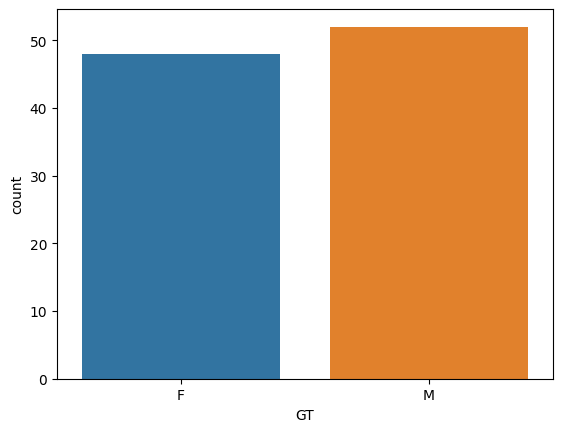

In [23]:
#Phần 3: trực quan hóa dl

#note: mục đích, sự phối hợp giữa các loại biến để chọn lựa biểu đồ phù hợp đi kèm số liệu trực quan
#định tính: bar,pie
#định lượng:scatter,line,histogram,box-plot
#hãy trực quan số lượng sinh viên theo giới tính

sns.countplot(x='GT',data=df)
plt.show()


In [ ]:
#note: các biến dùng phân nhóm. gom nhóm thông thường là biến
#định tính và nằm ở các thang đo mức 1,2,3,4
#tương ứng định danh, phân loại, thứ bậc, khoảng


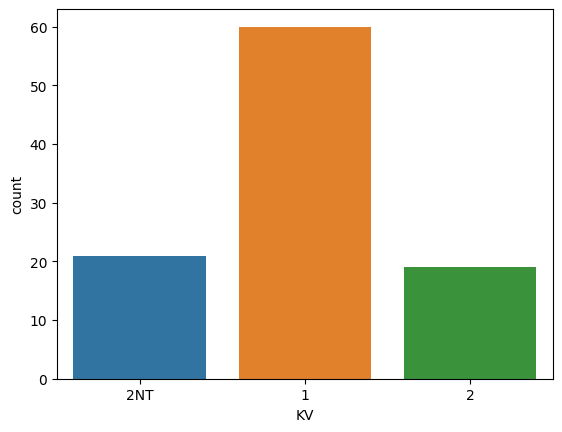

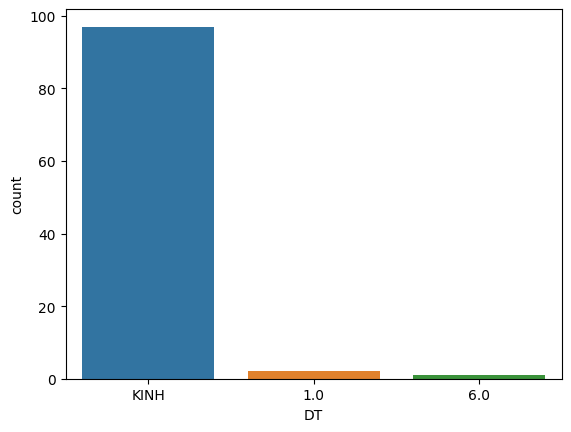

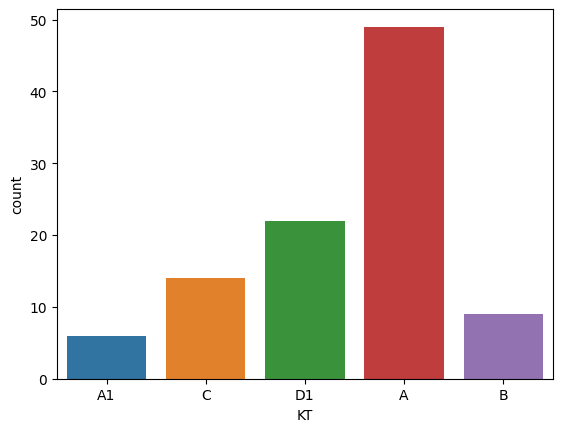

In [25]:
# dựa vào biểu đồ DT cho biết why ta không phân tích theo phân nhóm DT
sns.countplot(x='KV',data=df)
plt.show()
sns.countplot(x='DT',data=df)
plt.show()
sns.countplot(x='KT',data=df)
plt.show()

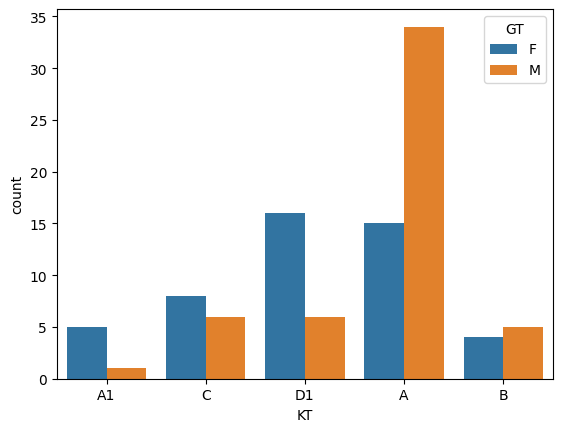

In [26]:
#hãy so sánh số lượng học sinh đăng ký khối thi dựa trên nhóm giới tính
sns.countplot(x='KT',hue='GT',data=df)
plt.show()

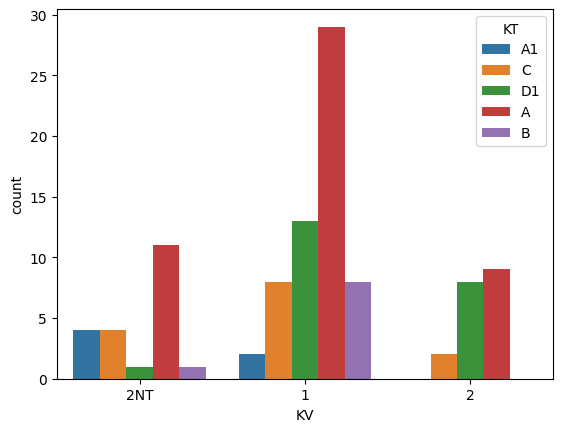

In [27]:
sns.countplot(x='KV',hue='KT',data=df)
plt.show()

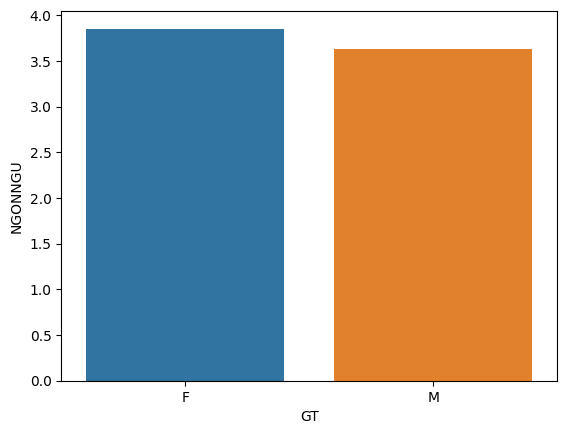

In [28]:
#so sánh điểm trung bình NGONNGU
sns.barplot(x='GT',y='NGONNGU',data=df,errorbar=None)
plt.show()

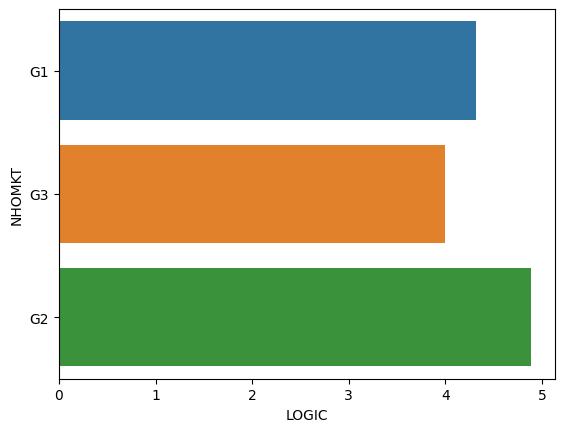

In [29]:
#so sánh điểm tb
sns.barplot(x='LOGIC',y='NHOMKT',data=df,errorbar=None)
plt.show()

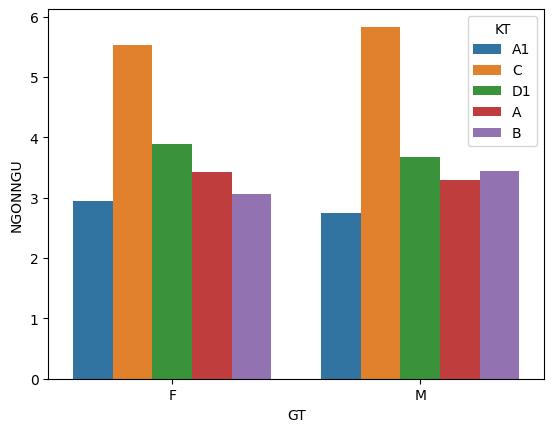

In [30]:
#so sánh diremd tb của NGONNGU theo nhóm GT dựa trên KT
sns.barplot(x='GT',y='NGONNGU',hue='KT',data=df,errorbar=None)
plt.show()

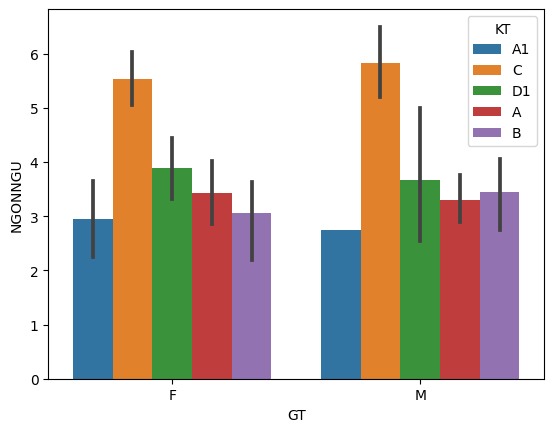

In [31]:
sns.barplot(x='GT',y='NGONNGU',hue='KT',data=df)
plt.show()
#sai số Nam(M) khối D1 cao nhất

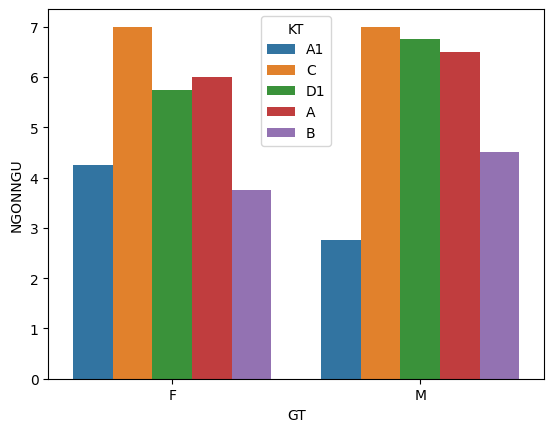

In [32]:
#so sánh điểm cao nhất của NGONNGU theo nhóm GT theo KT
#NOte: không để estimator thì mặc định là mean
sns.barplot(x='GT',y='NGONNGU',hue='KT',data=df,
            errorbar=None,estimator=max)
plt.show()

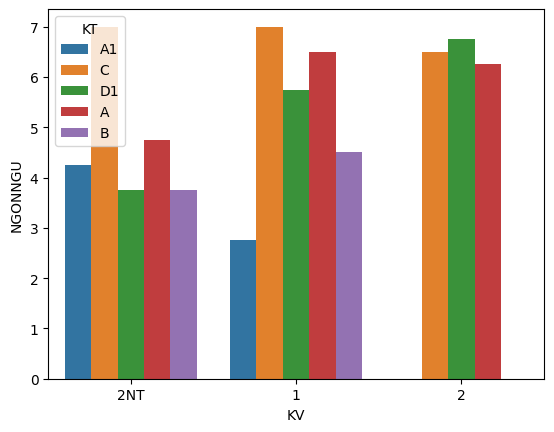

In [33]:
import numpy as np
#khi biến định tính làm nhóm tổng hợp
#có nhiều hơn 2 giá trị
#thì ta cần dùng hàm tổng hợp thông qua thư viện numpy
sns.barplot(x='KV',y='NGONNGU',hue='KT',data=df,
            errorbar=None,estimator=np.max)
plt.show()

In [ ]:
#note: với biến định tính thì ta chỉ có một hàm tổng là hàm COUNT, MODE
#với định lượng thì ta có thể tổng hợp như sau: COUNT,MIN,MAX,MEAN,MEDIAN,MODE,SUM,STD

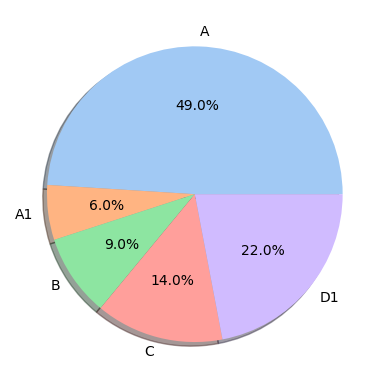

In [34]:
#BIỂU ĐỒ PIE
gb=df.groupby(['KT'])['KT'].agg(['count'])
labels=gb.index
data=list(gb['count'])

colors=sns.color_palette('pastel')#tạo bảng màu

plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

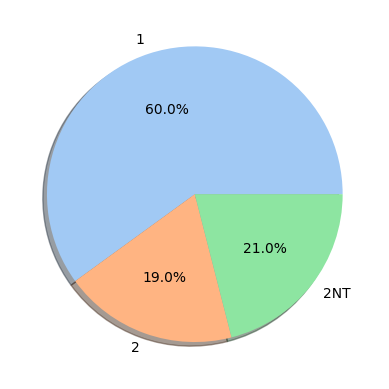

In [35]:
#thống kê tỉ lệ phần trăm cho KV
gb=df.groupby(['KV'])['KV'].agg(['count'])
labels=gb.index
data=list(gb['count'])

colors=sns.color_palette('pastel')#tạo bảng màu

plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

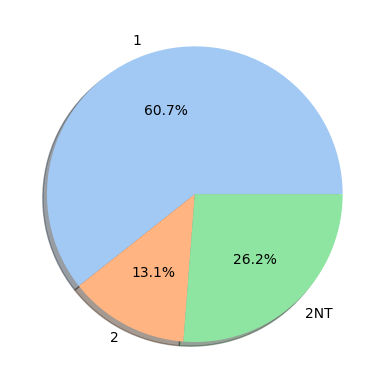

In [36]:
#trực quan tỉ lệ phần trăm tổng điểm CONG trên từng nhóm khu vực
gb=df.groupby(['KV'])['CONG'].agg(['sum'])
labels=gb.index
data=list(gb['sum'])

colors=sns.color_palette('pastel')#tạo bảng màu

plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
#khi trực quan dl
# note
#đt+đt
#đt+Đl
#dl+dl

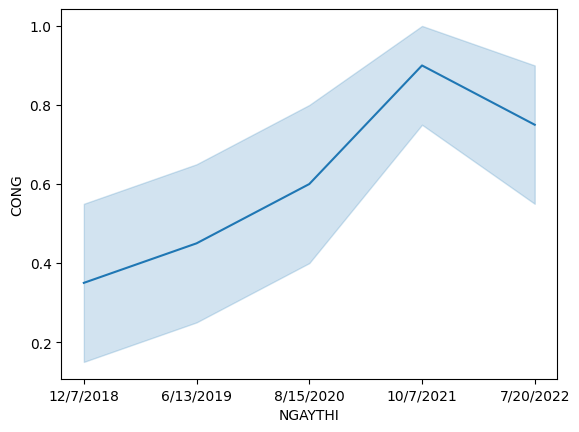

In [37]:
#tong hop trung bình diem cong theo nam thi
sns.lineplot(x='NGAYTHI',y='CONG',data=df)
plt.show()

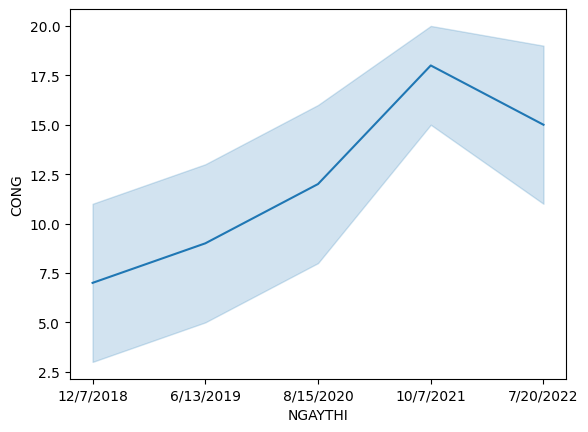

In [38]:

sns.lineplot(x='NGAYTHI',y='CONG',data=df,estimator=sum)
plt.show()

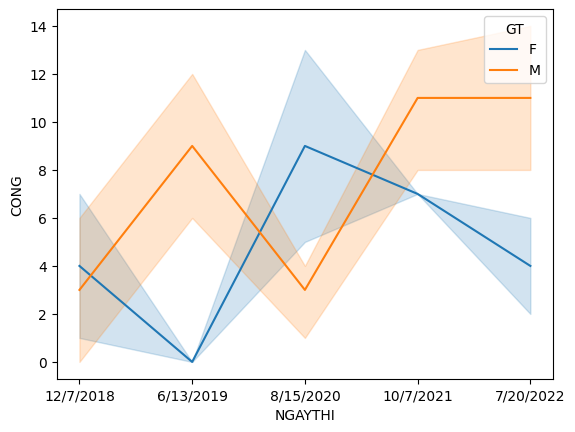

In [39]:

sns.lineplot(x='NGAYTHI',y='CONG',hue='GT',data=df,estimator=sum)
plt.show()

In [40]:
## Độ lệch chuẩn bẳng căn bậc 2 của phương sai

#Độ lệch chuẩn và phương sai thể hiện mức độ biến thiên của tập dữ liệu số 
#Độ lệch chuẩn càng cao thì tập dữ liệu biến động mạnh ngược lại các giá trị dữ liệu thay đổi nhỏ
#25% (Q1) có điểm ngôn ngữ nhỏ hơn 2,5
#50% (Q2) có 50 sinh viện bé hơn 3,625
#75% (Q3) có 25 sinh viên có điểm lớn hơn 4,75

df['NGONNGU'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: NGONNGU, dtype: float64

In [41]:

df[['NGONNGU','LOGIC','UNGXU']].describe()
#So sánh mức độ ổn định của điểm số
#trnog kì thi đánh giá năng lực
#Hãy cho biết mứ độ ổn định trong 3 cột điểm
#gợi ý: hưỡng dẫn giá trị CV(conffiecient of variant)

,NGONNGU,LOGIC,UNGXU
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [42]:

df[['NGONNGU','LOGIC','UNGXU']].std()/df[['NGONNGU','LOGIC','UNGXU']].mean()

NGONNGU    0.380858
LOGIC      0.249131
UNGXU      0.213566
dtype: float64

In [44]:
df.groupby('GT')['NGONNGU'].describe()
#Điểm trung bình lệch nhiều dùng CV
#còn hong thì dùng STD


,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [45]:
df.groupby('GT')['NGONNGU','LOGIC','UNGXU'].describe()
#tính nhiều biến
#mean (DTB) cao -> nam ứng xử tố hơn

C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_15096\536530990.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('GT')['NGONNGU','LOGIC','UNGXU'].describe()


NGONNGU                                                   LOGIC            \
     count      mean       std   min     25%   50%  75%  max count      mean   
GT                                                                             
F     48.0  3.854167  1.348594  1.25  3.1875  3.75  5.0  7.0  48.0  4.046875   
M     52.0  3.634615  1.496288  1.00  2.4375  3.50  4.5  7.0  52.0  4.447115   

    ...            UNGXU                                                      
    ...  75%   max count      mean       std   min     25%    50%  75%   max  
GT  ...                                                                       
F   ...  4.5  6.75  48.0  4.906250  0.946192  3.25  4.2500  4.875  5.5  7.25  
M   ...  5.0  8.00  52.0  4.846154  1.130194  2.75  4.1875  4.625  5.5  8.00  

[2 rows x 24 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

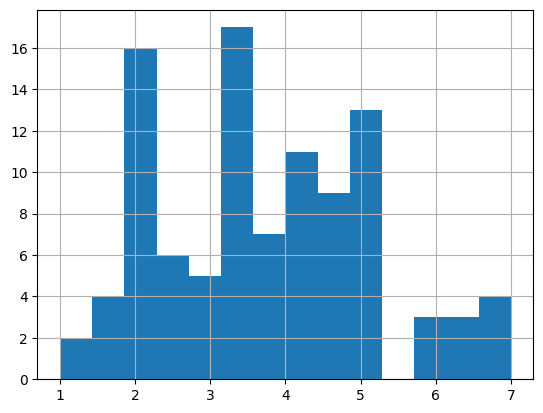

In [47]:
#Histogram  cho biết xác xuất xảy ra của biến cố trong khoảng giá rị dl nào nhiều nhất

df['NGONNGU'].hist(bins=14)
plt.show

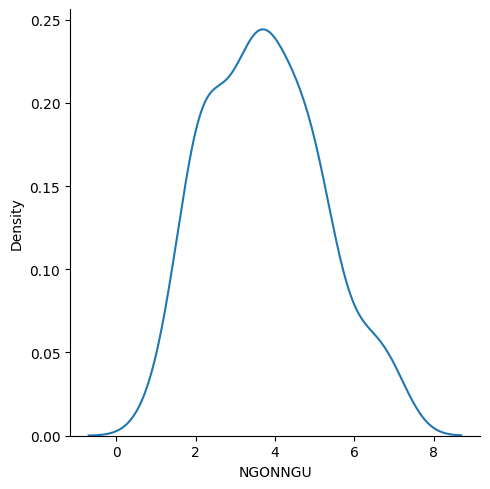

In [48]:
import seaborn as sns
sns.displot(df,x='NGONNGU',kind='kde')
plt.show()

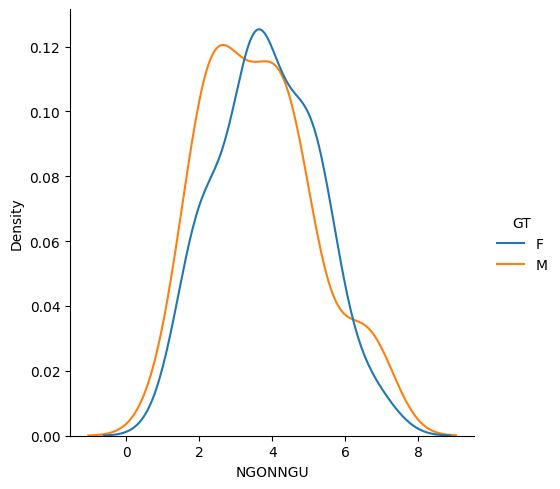

In [49]:
sns.displot(df,x='NGONNGU',hue='GT',kind='kde')
plt.show()

<AxesSubplot:>

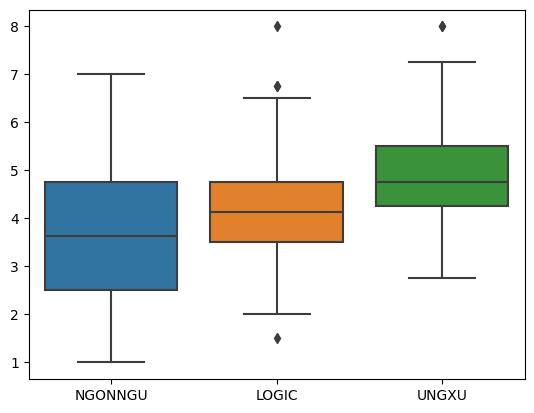

In [87]:
# 1. Q1: tứ phân vị 25%
#2.Q2:tứ phân vị 50%
#3. Q3: tứ phân vị 75%
#4. độ lớn IQR=[Q3-Q1]
#5.lower bound=Q1-1.5*IQR
#6.Upper bound=Q3+1.5*IQR
#7.các ngoại biên bất thường(outlier) cần xử lý trong dữ liệu
#outlier: là điểm dl khác biệt quá nhìu so vs đa số 
#+ tính khoảng nghi ngờ chứa outliers
#+tính khoảng  chắc chắn chứa outliers


sns.boxplot(data=df[['NGONNGU','LOGIC','UNGXU']])

In [ ]:
# hãy tính khoảng giá trị nghi ngờ bất thường
# hãy tính khoảng giá trị được cho là bất thường
# hãy tính xem có bao nhiêu sv có điểm thi là bất thường

<AxesSubplot:>

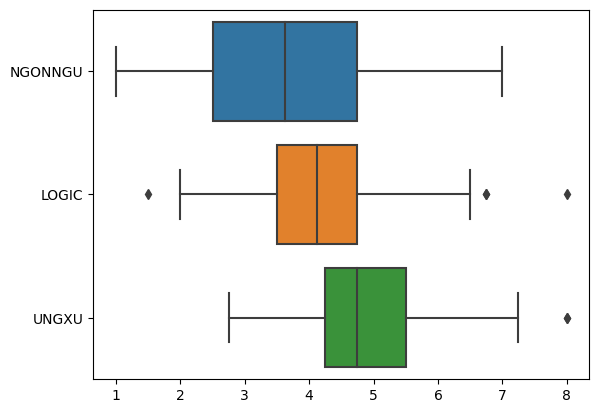

In [50]:
sns.boxplot(data=df[['NGONNGU','LOGIC','UNGXU']],orient='h')
#?: hãy cho biết điểm số môn nào không xảy ra bất thường
#-> ngonngu không bất thường

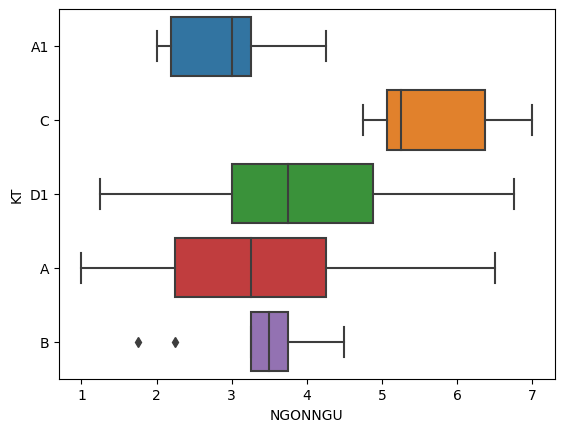

In [75]:
sns.boxplot(x='NGONNGU',y='KT',data=df,orient='h')
plt.show()
#?: khối thi nào có lower bound trùng với 
# tứ phân vị thứ 1( tức là Q1)

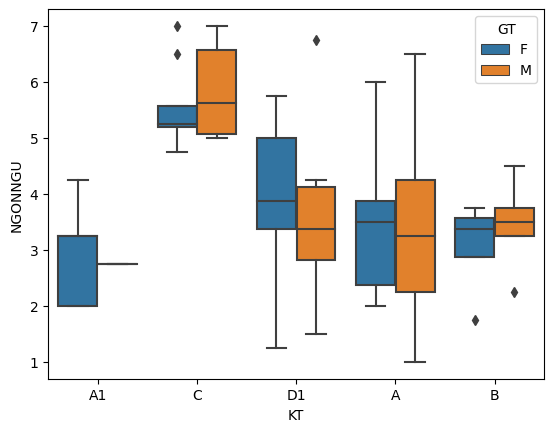

In [51]:
sns.boxplot(x='KT',y='NGONNGU',hue='GT',data=df)
plt.show()
#?: xác định các biểu đồ bất thường

In [52]:
##Skewess= độ xiên, độ lớn( trị tuyệt đối) cho biết mức độ dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn.
#cho biết xác xuất được phân bố lệch về phía nào nhiều
#trị tuyệt đối giá trị càng lớn thì dl phân phối nghiêng càng nhiều(lệch)

#diễn giải cho skewness
#Skewness>0 tức là trung bình >median: ta gọi là Positive Skewness hay lệch phải, tức là giá trị ngoại biên(outliers)sẽ đẩy giá trị trung bình về cuối
#Skewness<0 tức là trung bình <median:ta gọi là Negative Skewness hay lệch trái, tức là giá trị outliers( nhận giá trị nhỏ sẽ đảy giá trị trung bình về phía đầu)
#Skweness=0 thì mean =median=mode: phân phối không lệch còn được gọi là phân phối đối xứng(đều)
df['NGONNGU'].skew()

0.33322084231625376

In [53]:
df[['NGONNGU','LOGIC','UNGXU']].skew()

NGONNGU    0.333221
LOGIC      0.472551
UNGXU      0.607063
dtype: float64

In [54]:
#Kutosis: độ nhọn, trị tuyệt đối cho biết mức độ nhọn của phân phối
#Độ lớn Kutosis càng gần 3 thì fit
#dưới 3 thì fat
#trên 3 thì thin

#thông thường để đánh giá hình dáng độ nhọn ta dùng dại lượng excess kutosis=kutosis-3
#+nếu excess >0->thin
#+newes excess=0->fit
#nếu excess<0->fat
#trong pandas sử dugnj Fisher's kutosis tức là đã chuẩn hóa giá trị về excess kutosis theo mean=0

#*note: với phân phối chuẩn thì excess kutosis=0,skewness=0

#+trị tuyệt đối excess kutosis càng cao thì...

df[['NGONNGU']].kurtosis()
# câu hỏi : ngôn ngữ có độ nhọn how
#->fat

NGONNGU   -0.517004
dtype: float64

In [85]:
df[['NGONNGU','LOGIC','UNGXU']].kurtosis()

NGONNGU   -0.517004
LOGIC      1.372439
UNGXU      0.442173
dtype: float64